In [6]:
import numpy as np
import matplotlib
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["font.family"] = "Arial"
import matplotlib.pyplot as plt
import math
import torch
import pandas as pd
import seaborn as sns2

from src import datasets, query, snn

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
root = ""  # TODO: Change this to the project folder

In [8]:
snn.snn.BaseSNN.MIN_BETA = 0.01
snn.snn.BaseSNN.MAX_BETA = 0.99

In [9]:
train_shd = datasets.SHDDataset(f"{root}/data/SHD", train=True, dt=2)
test_shd = datasets.SHDDataset(f"{root}/data/SHD", train=False, dt=2)

train_nmnist = datasets.NMNISTDataset(f"{root}/data/N-MNIST", train=True, dt=1)
test_nmnist = datasets.NMNISTDataset(f"{root}/data/N-MNIST", train=False, dt=1)

In [10]:
supervised_query = query.SupervisedQuery(root)

In [11]:
nmnist_blocks_df = supervised_query.build_results(test_nmnist, ["blocks"], ["mg"], [10, 20, 30, 40, 50], 3)
nmnist_blocks_df["val_acc_100"] = nmnist_blocks_df["val_acc"] * 100
nmnist_blocks_df["ARP"] = nmnist_blocks_df["abs_refac"] * nmnist_blocks_df["dt"]
nmnist_standard_df = supervised_query.build_results(test_nmnist, ["standard"], ["mg"], [0], 3)

Loading nmnist_blocks_mg_10_1_0...
Loading nmnist_blocks_mg_10_1_1...
Loading nmnist_blocks_mg_10_1_2...
Loading nmnist_blocks_mg_20_1_0...
Loading nmnist_blocks_mg_20_1_1...
Loading nmnist_blocks_mg_20_1_2...
Loading nmnist_blocks_mg_30_1_0...
Loading nmnist_blocks_mg_30_1_1...
Loading nmnist_blocks_mg_30_1_2...
Loading nmnist_blocks_mg_40_1_0...
Loading nmnist_blocks_mg_40_1_1...
Loading nmnist_blocks_mg_40_1_2...
Loading nmnist_blocks_mg_50_1_0...
Loading nmnist_blocks_mg_50_1_1...
Loading nmnist_blocks_mg_50_1_2...
Loading nmnist_standard_mg_0_1_0...
Loading nmnist_standard_mg_0_1_1...
Loading nmnist_standard_mg_0_1_2...


In [12]:
shd_blocks_df = supervised_query.build_results(test_shd, ["blocks"], ["mg"], [10, 20, 30, 40, 50], 3)
shd_blocks_df["val_acc_100"] = shd_blocks_df["val_acc"] * 100
shd_blocks_df["ARP"] = shd_blocks_df["abs_refac"] * shd_blocks_df["dt"]
shd_standard_df = supervised_query.build_results(test_shd, ["standard"], ["mg"], [0], 3)

Loading shd_blocks_mg_10_2_0...
Loading shd_blocks_mg_10_2_1...
Loading shd_blocks_mg_10_2_2...
Loading shd_blocks_mg_20_2_0...
Loading shd_blocks_mg_20_2_1...
Loading shd_blocks_mg_20_2_2...
Loading shd_blocks_mg_30_2_0...
Loading shd_blocks_mg_30_2_1...
Loading shd_blocks_mg_30_2_2...
Loading shd_blocks_mg_40_2_0...
Loading shd_blocks_mg_40_2_1...
Loading shd_blocks_mg_40_2_2...
Loading shd_blocks_mg_50_2_0...
Loading shd_blocks_mg_50_2_1...
Loading shd_blocks_mg_50_2_2...
Loading shd_standard_mg_0_2_0...
Loading shd_standard_mg_0_2_1...
Loading shd_standard_mg_0_2_2...


In [14]:
def plot_acc(standard_df, blocks_df, ylim, ax, lw=6):
    standard_acc = standard_df.groupby(["abs_refac"]).mean()["val_acc"][0]
    ax = sns.barplot(blocks_df, x="ARP", y="val_acc_100", errorbar=("se"), color="lightsteelblue", errwidth=5, ax=ax)
    
    ax.set_ylabel("Accuracy (%)", fontsize=20, labelpad=8)
    ax.set_xlabel("ARP (ms)", fontsize=20, labelpad=8)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(2)
    ax.xaxis.set_tick_params(width=2, labelsize=16)
    ax.spines["left"].set_linewidth(2)
    ax.yaxis.set_tick_params(width=2, labelsize=16)
    
    ax.plot([0, 4], [standard_acc*100, standard_acc*100], '--', label="Standard", linewidth=lw)
    ax.set_ylim([0, ylim])
    current_handles, current_labels = ax.get_legend_handles_labels()
    ax.legend(current_handles, current_labels, loc="upper left", title="", fontsize=16, title_fontsize=16, frameon=False, bbox_to_anchor=(0, 1.2))
    
def plot_duration(standard_df, blocks_df, ax, lw=6):
    standard_duration = standard_df.groupby(["abs_refac"]).mean()["avg_time"][0]
    sns.barplot(blocks_df, x="ARP", y="avg_time", errorbar=("se"), color="lightsteelblue", errwidth=5, ax=ax)
    
    ax.set_ylabel("Avg. epoch duration (s)", fontsize=20, labelpad=8)
    ax.set_xlabel("ARP (ms)", fontsize=20, labelpad=8)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(2)
    ax.xaxis.set_tick_params(width=2, labelsize=16)
    ax.spines["left"].set_linewidth(2)
    ax.yaxis.set_tick_params(width=2, labelsize=16)
    
    ax.plot([0, 4], [standard_duration, standard_duration], '--', label="Standard", linewidth=lw)
    ax.set_ylim([0, standard_duration])
    current_handles, current_labels = ax.get_legend_handles_labels()
    ax.legend(current_handles, current_labels, loc="upper left", title="", fontsize=16, title_fontsize=16, frameon=False, bbox_to_anchor=(0, 1.2))


## NMNIST results

In [15]:
nmnist_q = nmnist_blocks_df["abs_refac"].isin([10, 20, 30, 40, 50])
shd_q = shd_blocks_df["abs_refac"].isin([10, 20, 30, 40, 50])

/tmp/ipykernel_823483/2093236679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  standard_acc = standard_df.groupby(["abs_refac"]).mean()["val_acc"][0]
/tmp/ipykernel_823483/2093236679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  standard_acc = standard_df.groupby(["abs_refac"]).mean()["val_acc"][0]
/tmp/ipykernel_823483/2093236679.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  standard_duration = sta

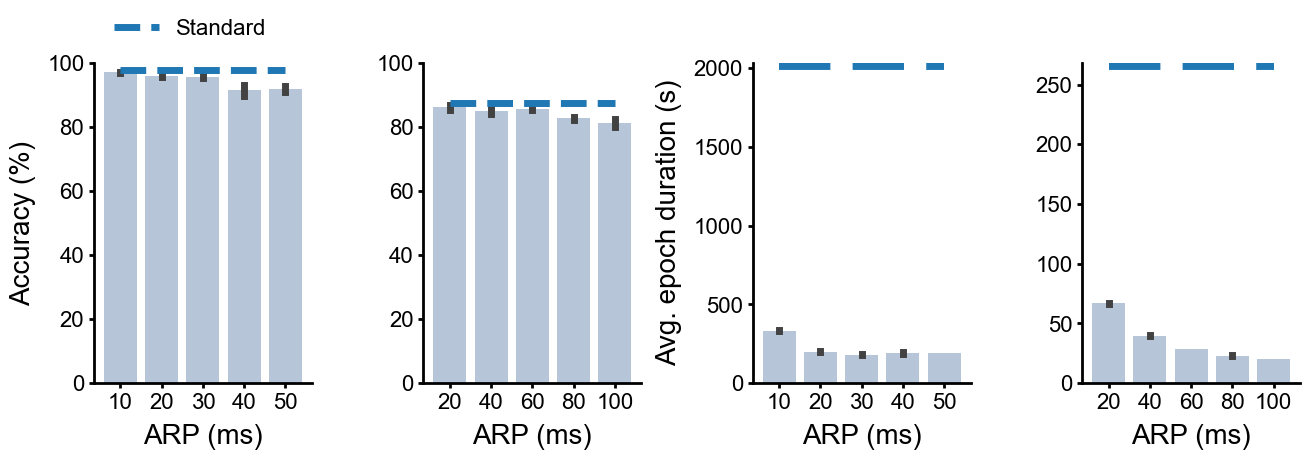

In [16]:
fig, axs = plt.subplots(1, 4, figsize=(6.6*2, 2.4*2))
plot_acc(nmnist_standard_df, nmnist_blocks_df[nmnist_q], ylim=100, ax=axs[0], lw=5)
plot_acc(shd_standard_df, shd_blocks_df[shd_q], ylim=100, ax=axs[1], lw=5)

plot_duration(nmnist_standard_df, nmnist_blocks_df[nmnist_q], ax=axs[2], lw=10)
plot_duration(shd_standard_df, shd_blocks_df[shd_q], ax=axs[3], lw=10)

axs[1].set_ylabel("")
axs[3].set_ylabel("")
axs[1].legend().set_visible(False)
axs[2].legend().set_visible(False)
axs[3].legend().set_visible(False)

plt.tight_layout()

## Supplementary surrogate gradient search

In [17]:
shd_blocks_df = supervised_query.build_results(test_shd, ["blocks"], ["mg", "fast_sigmoid", "box_car"], [10, 20, 30, 40, 50], 3)
shd_blocks_df["val_acc_100"] = shd_blocks_df["val_acc"] * 100

Loading shd_blocks_mg_10_2_0...
Loading shd_blocks_mg_10_2_1...
Loading shd_blocks_mg_10_2_2...
Loading shd_blocks_mg_20_2_0...
Loading shd_blocks_mg_20_2_1...
Loading shd_blocks_mg_20_2_2...
Loading shd_blocks_mg_30_2_0...
Loading shd_blocks_mg_30_2_1...
Loading shd_blocks_mg_30_2_2...
Loading shd_blocks_mg_40_2_0...
Loading shd_blocks_mg_40_2_1...
Loading shd_blocks_mg_40_2_2...
Loading shd_blocks_mg_50_2_0...
Loading shd_blocks_mg_50_2_1...
Loading shd_blocks_mg_50_2_2...
Loading shd_blocks_fast_sigmoid_10_2_0...
Loading shd_blocks_fast_sigmoid_10_2_1...
Loading shd_blocks_fast_sigmoid_10_2_2...
Loading shd_blocks_fast_sigmoid_20_2_0...
Loading shd_blocks_fast_sigmoid_20_2_1...
Loading shd_blocks_fast_sigmoid_20_2_2...
Loading shd_blocks_fast_sigmoid_30_2_0...
Loading shd_blocks_fast_sigmoid_30_2_1...
Loading shd_blocks_fast_sigmoid_30_2_2...
Loading shd_blocks_fast_sigmoid_40_2_0...
Loading shd_blocks_fast_sigmoid_40_2_1...
Loading shd_blocks_fast_sigmoid_40_2_2...
Loading shd_bloc

In [18]:
def plot_sg_acc(blocks_df, ylim, ax, lw=6):
    ax = sns.barplot(blocks_df, x="abs_refac", y="val_acc_100", hue="sg", errorbar=("se"), color="lightsteelblue", errwidth=5, ax=ax)
    
    ax.set_ylabel("Accuracy (%)", fontsize=20, labelpad=8)
    ax.set_xlabel("ARP (steps)", fontsize=20, labelpad=8)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(2)
    ax.xaxis.set_tick_params(width=2, labelsize=16)
    ax.spines["left"].set_linewidth(2)
    ax.yaxis.set_tick_params(width=2, labelsize=16)
    
    ax.set_ylim([0, ylim])
    current_handles, current_labels = ax.get_legend_handles_labels()
    current_labels = ["multi-Gaussian", "fast sigmoid", "boxcar"]
    print(current_labels)
    #[ha.set_linewidth(4) for ha in current_handles]
    ax.legend(current_handles, current_labels, loc="upper left", title="", fontsize=16, title_fontsize=16, frameon=False, bbox_to_anchor=(0, 1.4))

['multi-Gaussian', 'fast sigmoid', 'boxcar']


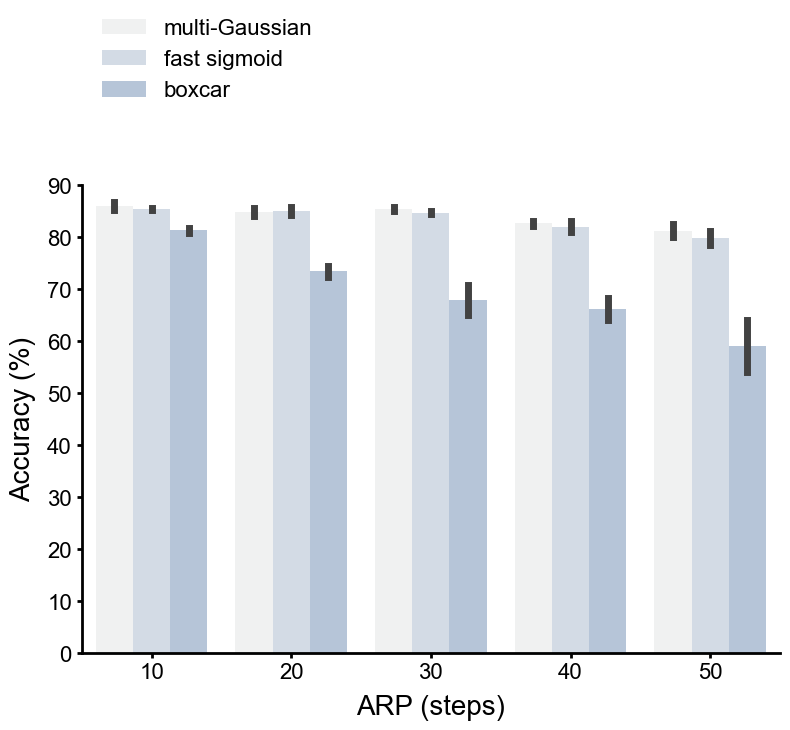

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(4*2, 4*2))
plot_sg_acc(shd_blocks_df, 90, ax=axs)
plt.tight_layout()

## Supplementary surrogate gradient attaching/detaching

In [20]:
detached_shd_blocks_df = supervised_query.build_results(test_shd, ["blocks"], ["mg", "fast_sigmoid", "box_car"], [30], 3, detach=True)
attached_shd_blocks_df = supervised_query.build_results(test_shd, ["blocks"], ["mg", "fast_sigmoid", "box_car"], [30], 3, detach=False)

detached_shd_blocks_df["val_acc_100"] = detached_shd_blocks_df["val_acc"] * 100
attached_shd_blocks_df["val_acc_100"] = attached_shd_blocks_df["val_acc"] * 100

detached_shd_blocks_df["detach"] = True
attached_shd_blocks_df["detach"] = False

attach_detach_shd_blocks_df = pd.concat([detached_shd_blocks_df, attached_shd_blocks_df])

Loading shd_blocks_mg_30_2_0...
Loading shd_blocks_mg_30_2_1...
Loading shd_blocks_mg_30_2_2...
Loading shd_blocks_fast_sigmoid_30_2_0...
Loading shd_blocks_fast_sigmoid_30_2_1...
Loading shd_blocks_fast_sigmoid_30_2_2...
Loading shd_blocks_box_car_30_2_0...
Loading shd_blocks_box_car_30_2_1...
Loading shd_blocks_box_car_30_2_2...
Loading shd_blocks_mg_30_2_False_0...
Loading shd_blocks_mg_30_2_False_1...
Loading shd_blocks_mg_30_2_False_2...
Loading shd_blocks_fast_sigmoid_30_2_False_0...
Loading shd_blocks_fast_sigmoid_30_2_False_1...
Loading shd_blocks_fast_sigmoid_30_2_False_2...
Loading shd_blocks_box_car_30_2_False_0...
Loading shd_blocks_box_car_30_2_False_1...
Loading shd_blocks_box_car_30_2_False_2...


In [21]:
def plot_attach_detach_acc(blocks_df, ylim, ax, lw=6):
    ax = sns.barplot(blocks_df, x="sg", y="val_acc_100", hue="detach", errorbar=("se"), color="lightsteelblue", errwidth=5, ax=ax)
    
    ax.set_ylabel("Accuracy (%)", fontsize=20, labelpad=8)
    ax.set_xlabel("ARP (steps)", fontsize=20, labelpad=8)
    ax.set_xticklabels(["multi-Gaussian", "fast sigmoid", "boxcar"], fontsize=20)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(2)
    ax.xaxis.set_tick_params(width=2, labelsize=16)
    ax.spines["left"].set_linewidth(2)
    ax.yaxis.set_tick_params(width=2, labelsize=16)
    
    ax.set_ylim([0, ylim])
    current_handles, current_labels = ax.get_legend_handles_labels()
    print(current_labels)
    current_labels = ["SG attached", "SG detached"]
    #[ha.set_linewidth(4) for ha in current_handles]
    ax.legend(current_handles, current_labels, loc="upper left", title="", fontsize=16, title_fontsize=16, frameon=False, bbox_to_anchor=(0, 1.4))

['False', 'True']


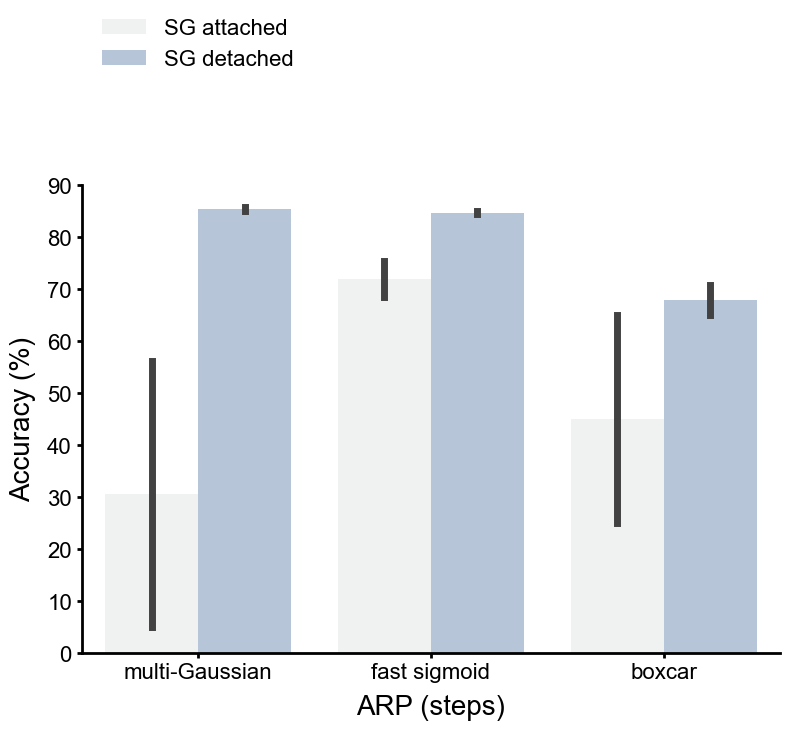

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(4*2, 4*2))
plot_attach_detach_acc(attach_detach_shd_blocks_df, 90, ax=axs)
plt.tight_layout()